<a href="https://colab.research.google.com/github/Ram0060/ML-projects-/blob/main/banking_curn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects /classifcation projects/Bank Customer Churn Prediction.csv', index_col = 'customer_id')

In [4]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


# exploring the data set


In [7]:
df.describe(include = 'all')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<ipython-input-8-e039b2077dd5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df, palette="viridis")


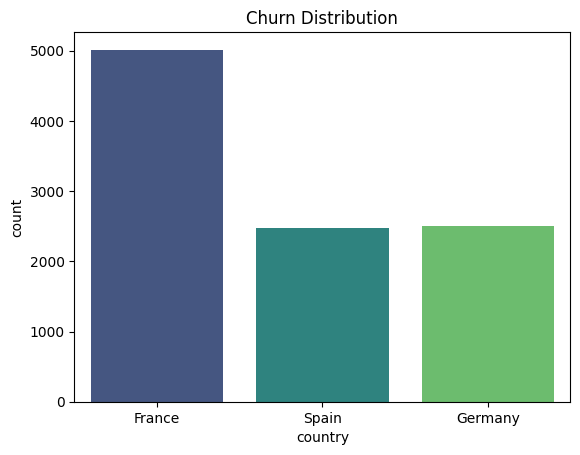

In [8]:
sns.countplot(x='country', data=df, palette="viridis")
plt.title('Churn Distribution')
plt.show()

<ipython-input-9-9bb728cabce8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data =df, palette= 'viridis')


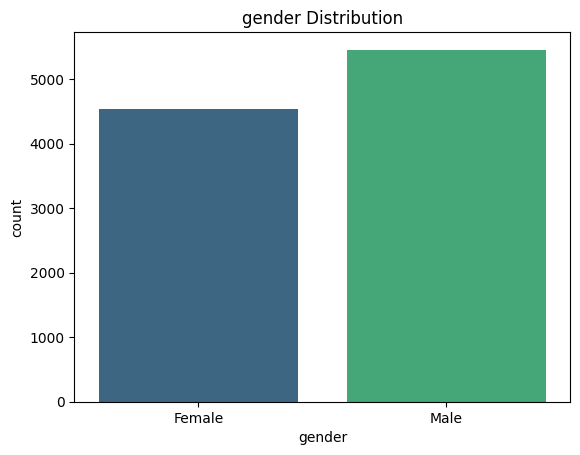

In [9]:
df['gender'].value_counts()
sns.countplot(x='gender', data =df, palette= 'viridis')
plt.title('gender Distribution')
plt.show()

<ipython-input-10-2185bc76a158>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data =df, palette= 'viridis')


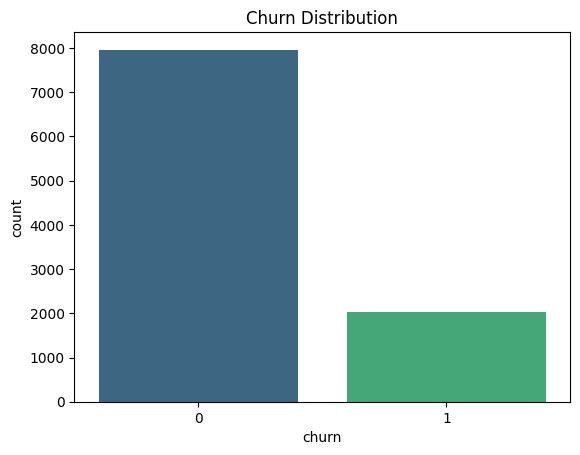

In [10]:
df['churn'].value_counts()
sns.countplot(x='churn', data =df, palette= 'viridis')
plt.title('Churn Distribution')
plt.show()

<ipython-input-11-21a8073c437d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='active_member', data =df, palette= 'viridis')


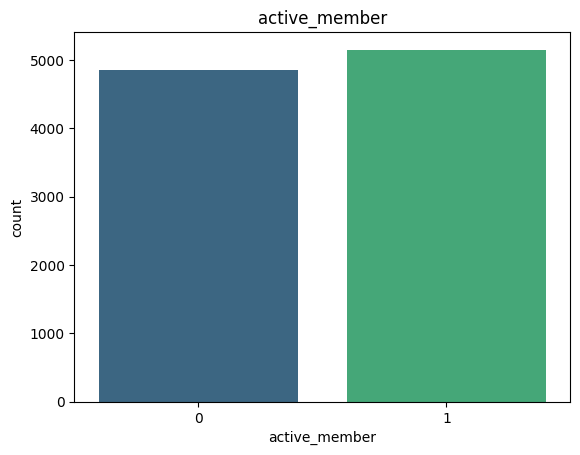

In [11]:
df['active_member'].value_counts()
sns.countplot(x='active_member', data =df, palette= 'viridis')
plt.title('active_member')
plt.show()

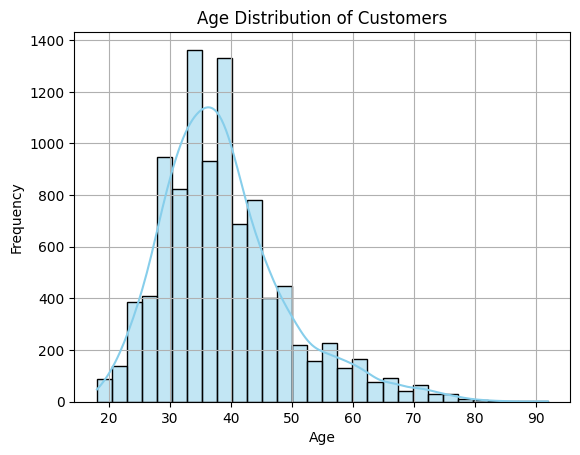

In [12]:
# Histogram for Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [13]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [14]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
15574012,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
15592531,822,France,1,50,7,0.00,2,1,1,10062.80,0
15656148,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
15792365,501,France,1,44,4,142051.07,2,0,1,74940.50,0


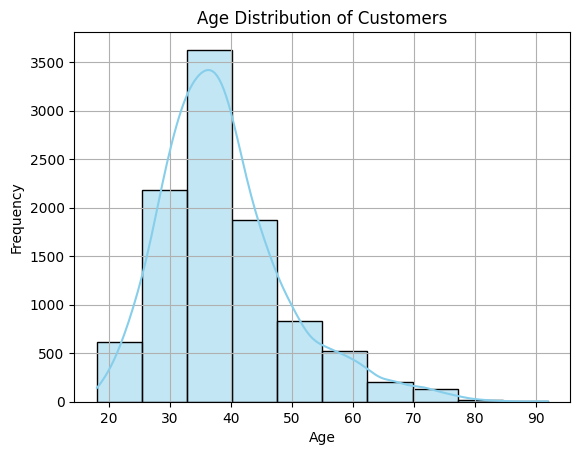

In [15]:
sns.histplot(df['age'], bins = 10, kde = True, color = 'skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

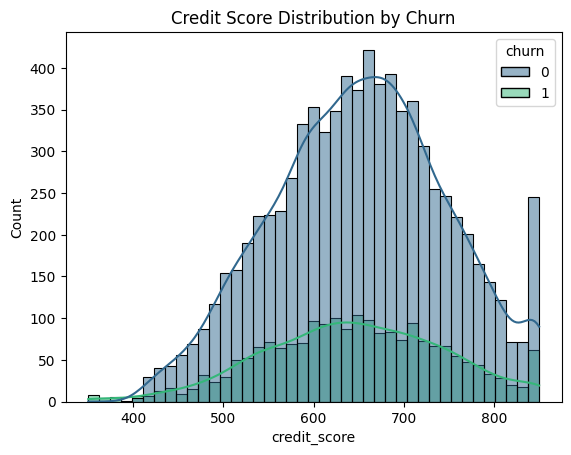

In [16]:
sns.histplot(data=df, x='credit_score', hue='churn', kde=True, palette="viridis")
plt.title('Credit Score Distribution by Churn')
plt.show()


In [17]:


df = pd.get_dummies(df, columns = ['country'], drop_first = True, dtype = int)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
customer_id,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


credit_score       -0.071596
balance            -0.141088
estimated_salary    0.002085
dtype: float64


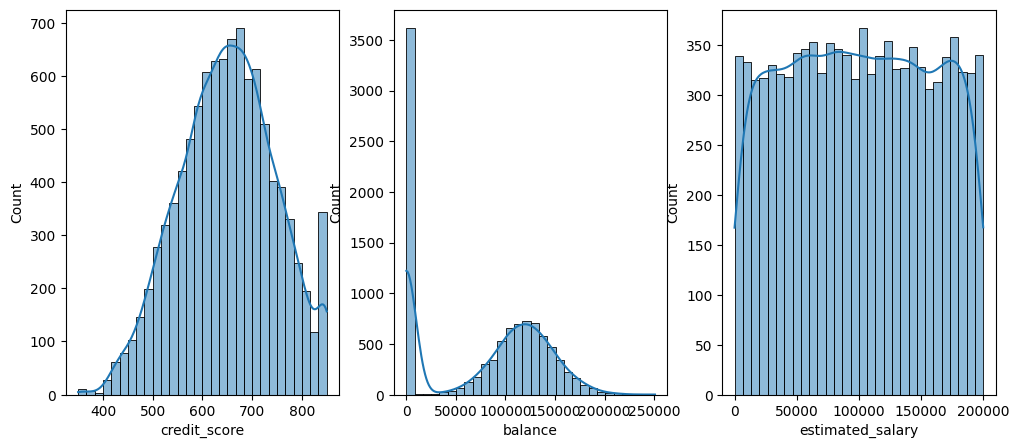

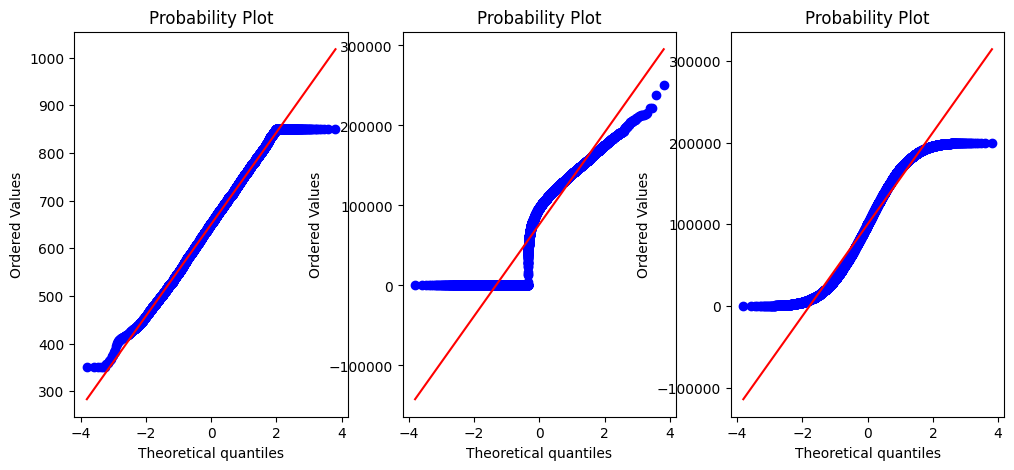

In [18]:
from scipy.stats import skew
from scipy.stats import probplot

# Select numerical columns to check skewness
features = ['credit_score', 'balance', 'estimated_salary']

# Calculate skewness for each feature
skewness_values = df[features].apply(skew)

# Print results
print(skewness_values)

plt.figure(figsize=(12, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
plt.show()

plt.figure(figsize=(12, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    probplot(df[feature], dist="norm", plot=plt)
plt.show()


In [19]:

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

df['credit_score'] = standard_scaler.fit_transform(df[['credit_score']])
df['estimated_salary'] = minmax_scaler.fit_transform(df[['estimated_salary']])
df['balance'] = robust_scaler.fit_transform(df[['balance']])


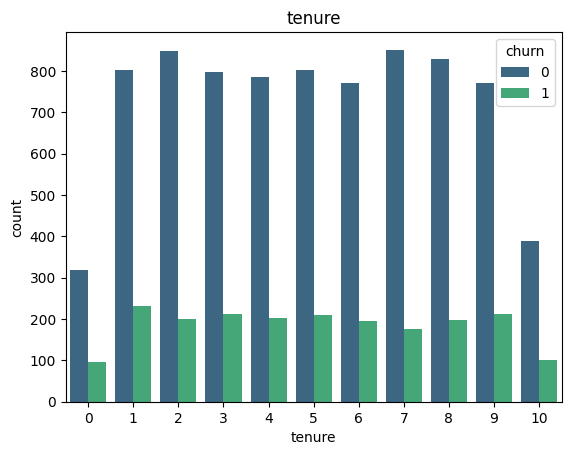

In [20]:
df['tenure'].value_counts()
sns.countplot(x='tenure',hue='churn', data =df, palette= 'viridis')
plt.title('tenure')
plt.show()

# machine learning model
###As we can see the data is imbalaced we are try to implement the logistic regression model with class = balanced.As the data is imbalanced rather than the accuracy we should be focusing on  percision, recall and f1 score.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [22]:


# Initialize and train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7195
ROC AUC Score: 0.7823073671009942
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



trying out with over-sampling through smote as the data is imbalanced.
 Furthermore, using ridge regression to balance the variance-bias-preventing correlation affects to the model.


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

log_reg_smote = LogisticRegression(max_iter=500, solver='saga', penalty='l2', C=1.0, random_state=42)
log_reg_smote.fit(X_train_sm, y_train_sm)

y_pred_smote = log_reg_smote.predict(X_test)
y_pred_proba_smote = log_reg_smote.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_proba_smote)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred_smote))



Accuracy: 0.7985
ROC AUC Score: 0.7677384724274049
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      1607
           1       0.49      0.46      0.47       393

    accuracy                           0.80      2000
   macro avg       0.68      0.67      0.67      2000
weighted avg       0.79      0.80      0.80      2000



Compared to Model 1, the tuned Logistic Regression model (Model 2) has shown improved accuracy (71.9% → 79.85%) and better precision for predicting churn (0.38 → 0.49). However, recall dropped slightly (0.71 → 0.46), meaning the model is still missing many actual churned customers. While overall performance is better, the trade-off between precision and recall needs further optimization.

# Hyperparameters to Tune in Logistic Regression:
1. Regularization Type (penalty) : L1(LASSO, Shrinks some coefficients to zero), L2(RIDGE, Shrinks coefficients but keeps all features),           ELASTIC NET(L1+L2)                                                          Best Practice: Use L2 (Ridge) for general models, L1 for feature selection.

2. Regularization Strength: High C (e.g., C=10) → Less regularization, Low C (e.g., C=0.01) → More regularization
Best Practice: Tune C using cross-validation.

3. Solver: Defines the optimization algorithm to minimize loss.
"liblinear" → Works well for small datasets & L1 penalty.
"lbfgs" → Default, works well for L2 penalty, medium-sized datasets.
"saga" → Best for large datasets, supports L1, L2, ElasticNet.
"newton-cg" / "sag" → Good for very large datasets.
Best Practice: Use "saga" for large datasets, "liblinear" for L1 regularization.

4. class_weight: Adjusts how much weight is given to each class (useful for imbalanced data).
Options:
"balanced" → Automatically adjusts for class imbalance.
{0:1, 1:5} → Custom weight (e.g., gives 5x more importance to the churn class).
Best Practice: Use "balanced" for imbalanced datasets like churn prediction.

5. Maximum Iterations (max_iter):
What It Does? Controls how many iterations the solver runs before stopping.
Default: max_iter=100
Best Practice: Increase to 500 or more if getting a convergence warning.

REMEMBER :'IF YOU ARE STUCK WITH WHAT C_VALUE, KIND OF SOLVER, MAX_ITER ETC. ALWAYS GO FOR GRID SEARCH. IT GIVES YOU THE BEST OPTION'. But remember the basic intuition that we are using in the current situation.

classification metrics:
1. Accuracy: percentage of correct prediction(should be considered as a main performance metric when class distribution is balanced).
2. Precision: out of **predicted positives**, how many are actually positive(use when flase positive matter, eg fraud detection)
3. Recall: out of all the positives from the data, how many are correctly predicted? (When False Negatives matter, eg cancer detection)
4. F1-Score: Balance between Precision & Recall (good for imbalanced data).
5. ROC-AUC Score: Measures how well model separates classes.(Best for imbalanced data and ranking problems.)


In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'newton-cg'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500]
    }
log_reg_1 = LogisticRegression()

grid_search = GridSearchCV(log_reg_1,param_grid, cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

print('best_hyperparameters:',grid_search.best_params_)
print('best_f1:', grid_search.best_score_)

best_hyperparameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
best_f1: 0.5042111589043329


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

In [93]:
log_reg_2 = LogisticRegression(max_iter =1000, penalty ='l2', solver ='newton-cg', class_weight ='balanced' , C =0.001)
log_reg_2.fit(X_train, y_train)
y_pred_2 = log_reg_2.predict(X_test)
y_pred_proba_2 = log_reg_2.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_2)
roc_auc = roc_auc_score(y_test, y_pred_proba_2)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Accuracy: 0.7295
ROC AUC Score: 0.7729969551152639
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1607
           1       0.39      0.70      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.73      0.75      2000



Decision Threshold: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.85      1607
           1       0.45      0.61      0.52       393

    accuracy                           0.78      2000
   macro avg       0.67      0.71      0.69      2000
weighted avg       0.81      0.78      0.79      2000

ROC AUC Score: 0.7823


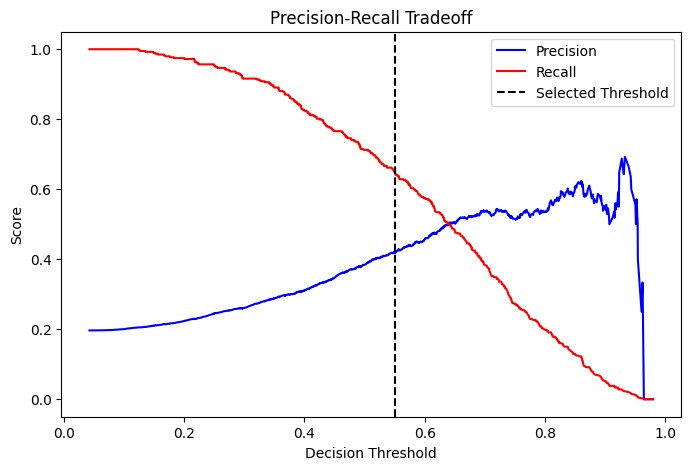

In [94]:

from sklearn.metrics import precision_recall_curve
new_threshold = 0.55  # Increase from default 0.5

y_pred_adjusted = (y_pred_proba_2 >= new_threshold).astype(int)

# Evaluate performance at new threshold
print(f"Decision Threshold: {new_threshold}")
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Precision-Recall Curve to find best threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Tradeoff
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.axvline(x=new_threshold, color="black", linestyle="--", label="Selected Threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()


# decision tree classifier


In [95]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")  # Handles class imbalance

# Train the model
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]  # Get probability scores for ROC AUC

# Model Evaluation
print("Decision Tree Classifier Performance:")
print("Accuracy:", round(dt_clf.score(X_test, y_test), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba_dt), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier Performance:
Accuracy: 0.803
ROC AUC Score: 0.6833

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.50      0.49      0.49       393

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [5, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 25],
    'criterion': ['entropy']
}

# Initialize Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Perform Grid Search
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train best model
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
y_pred_proba_best_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluate
print("\nOptimized Decision Tree Performance:")
print("Accuracy:", round(best_dt.score(X_test, y_test), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba_best_dt), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_dt))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 5}

Optimized Decision Tree Performance:
Accuracy: 0.7655
ROC AUC Score: 0.8364

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1607
           1       0.44      0.77      0.56       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.77      0.79      2000



# Hyperparameters for Decision Tree Tuning
1. criterion(split rule): "gini" → Faster, good for balanced data
"entropy" → Slower but better for imbalanced data
2. max_depth: revents overfitting (too deep) and underfitting (too shallow)
3. min_samples_split: Higher values prevent too many splits and overfitting
4. min_samples_leaf: Higher values prevent small, isolated leaf nodes
5. max_features: Controls feature selection per split, reducing overfitting.[None, "sqrt", "log2"]
6. class_weight: balanced, none
7. splitter: ["best"(feature selection), "random"(reduces varience)]  


# random forest

In [102]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]  # Get probability scores for ROC AUC

# Model Evaluation
print("Random Forest Classifier Performance:")
print("Accuracy:", round(rf_clf.score(X_test, y_test), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba_rf), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.866
ROC AUC Score: 0.8603

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1)

# Perform Grid Search
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
print("\nOptimized Random Forest Performance:")
print("Accuracy:", round(best_rf.score(X_test, y_test), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba_best_rf), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Optimized Random Forest Performance:
Accuracy: 0.845
ROC AUC Score: 0.8668

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.68      0.63       393

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000



Best Threshold (F1-Score Optimized): 0.486
Best Threshold (Youden's J Statistic): 1.000
Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.70      0.64       393

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.86      0.84      0.85      2000

ROC AUC Score: 0.8668


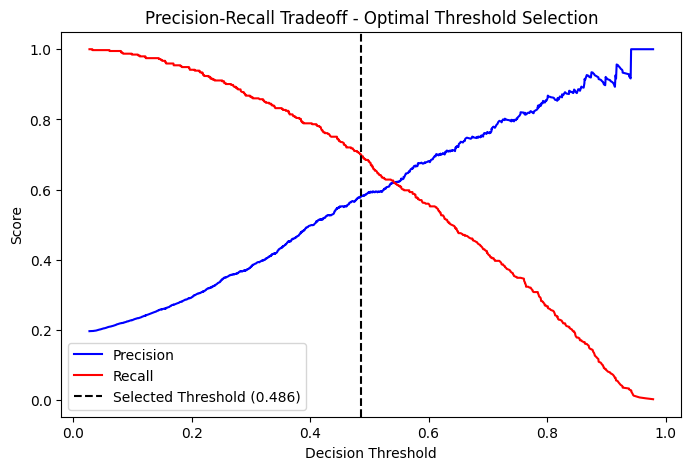

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, roc_curve

# Get predicted probabilities from the optimized Random Forest model
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for churn (class 1)

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)

# Compute F1-scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

# Method 1: Best Threshold using Youden's J Statistic (Sensitivity + Specificity - 1)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_best_rf)
youden_index = tpr - fpr  # J = Sensitivity - (1 - Specificity)
best_threshold_youden = roc_thresholds[np.argmax(youden_index)]

# Method 2: Best Threshold by Maximizing F1-Score
best_threshold_f1 = thresholds[np.argmax(f1_scores)]

# Choose the best method (uncomment one)
selected_threshold = best_threshold_f1  # OR use best_threshold_youden

# Apply new threshold
y_pred_adjusted_rf = (y_pred_proba_rf >= selected_threshold).astype(int)

# Evaluate the model with new threshold
print(f"Best Threshold (F1-Score Optimized): {best_threshold_f1:.3f}")
print(f"Best Threshold (Youden's J Statistic): {best_threshold_youden:.3f}")
print("Classification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Plot Precision-Recall Tradeoff
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.axvline(x=selected_threshold, color="black", linestyle="--", label=f"Selected Threshold ({selected_threshold:.3f})")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff - Optimal Threshold Selection")
plt.legend()
plt.show()
